In [1]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
#Setting of proper views of rows and columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
df = pd.read_csv(r'E:\Upgrad\Course_3\train.csv')
#Exploring the top 5 rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.shape

(1460, 81)

In [6]:
#defining a function "plotting" for categorical analysis
def plotting(df, column):
    
    df = df
    col = column
    #setting the figure size
    fig = plt.figure(figsize=(8,6))
    #plotting count plot
    sns.countplot(x= column,data = df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')

    fig.tight_layout() 

    plt.show()


In [7]:
#Selecting only categorical columns:
cat = list(df.select_dtypes(include='object').columns)

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Plotting  MSZoning


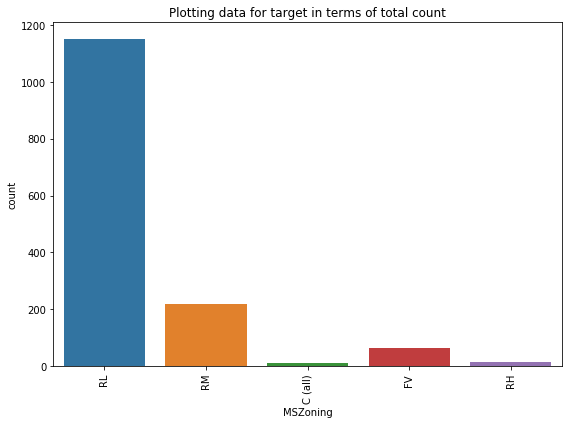

----------------------------------------------------------------------------------------------
Plotting  Street


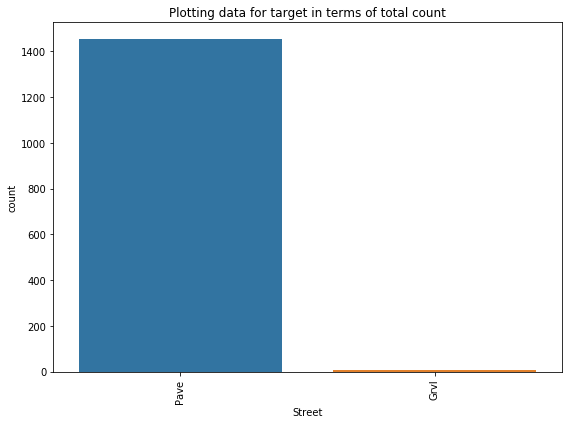

----------------------------------------------------------------------------------------------
Plotting  Alley


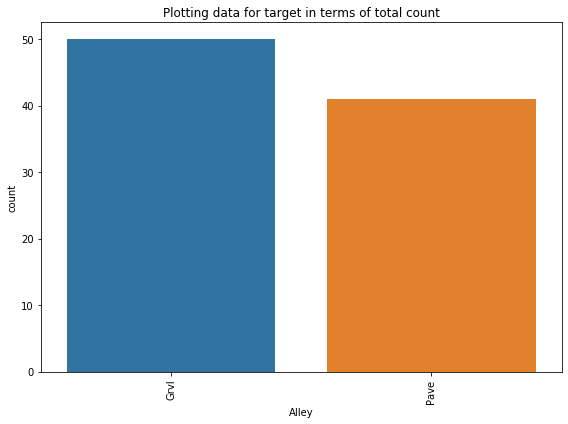

----------------------------------------------------------------------------------------------
Plotting  LotShape


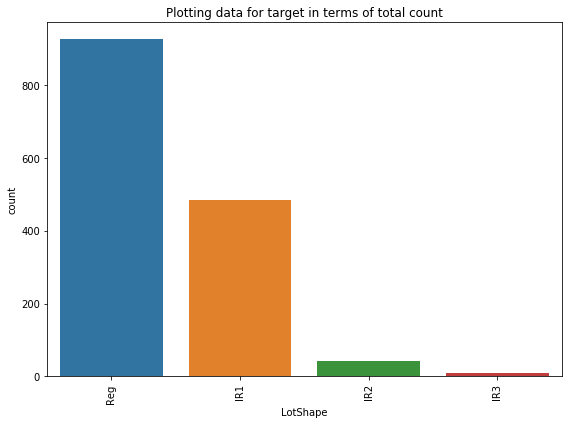

----------------------------------------------------------------------------------------------
Plotting  LandContour


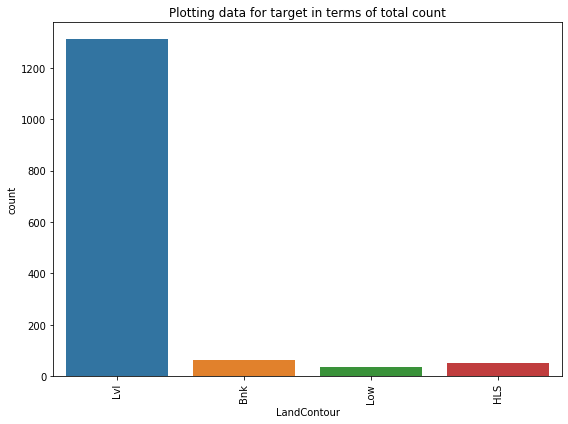

----------------------------------------------------------------------------------------------
Plotting  Utilities


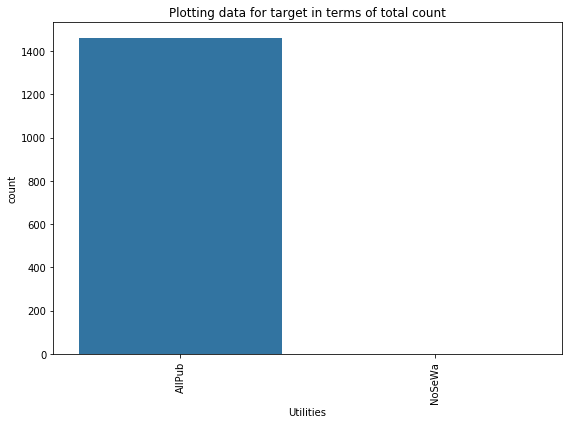

----------------------------------------------------------------------------------------------
Plotting  LotConfig


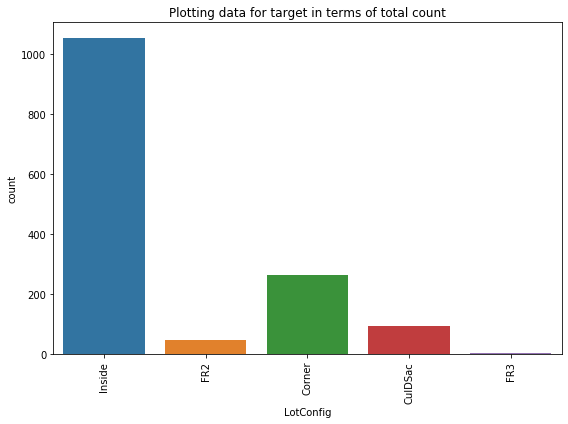

----------------------------------------------------------------------------------------------
Plotting  LandSlope


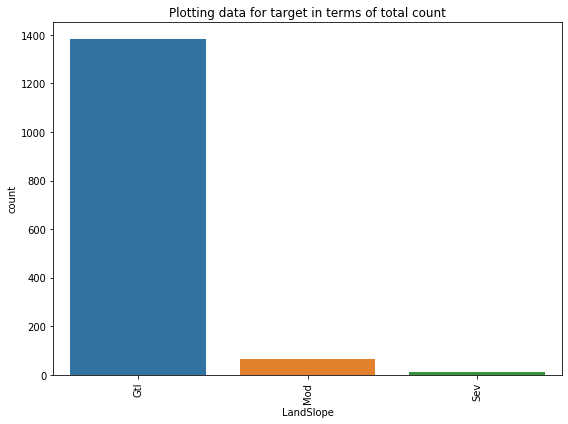

----------------------------------------------------------------------------------------------
Plotting  Neighborhood


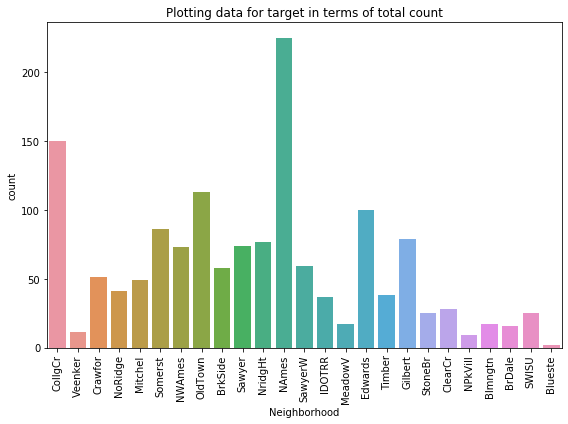

----------------------------------------------------------------------------------------------
Plotting  Condition1


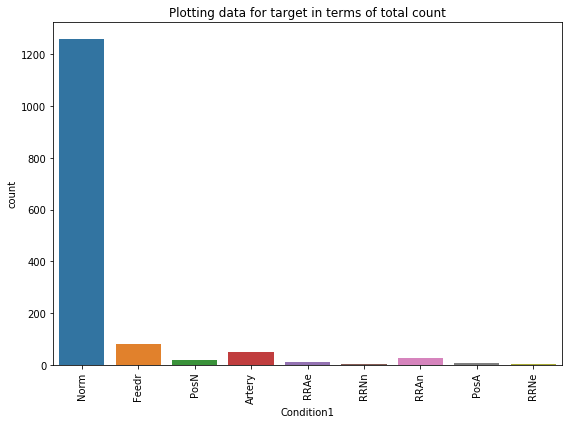

----------------------------------------------------------------------------------------------
Plotting  Condition2


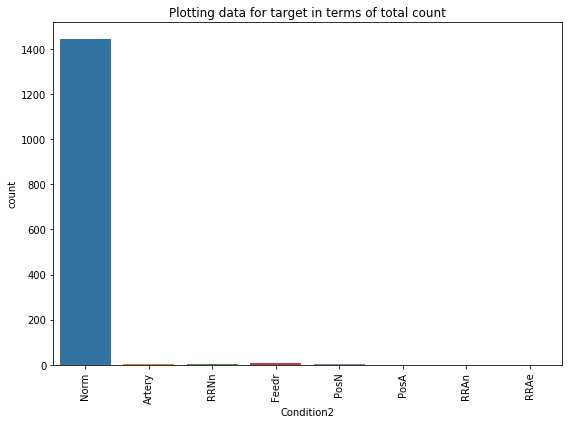

----------------------------------------------------------------------------------------------
Plotting  BldgType


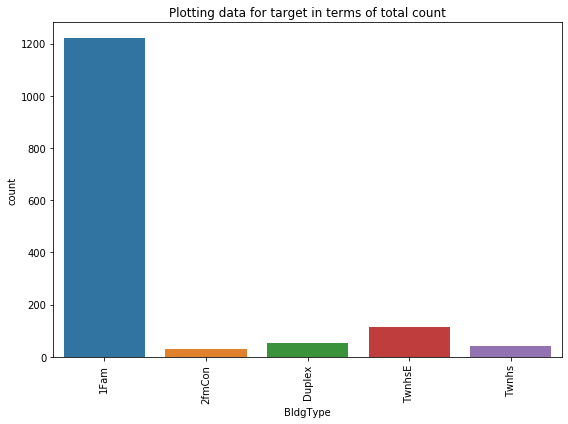

----------------------------------------------------------------------------------------------
Plotting  HouseStyle


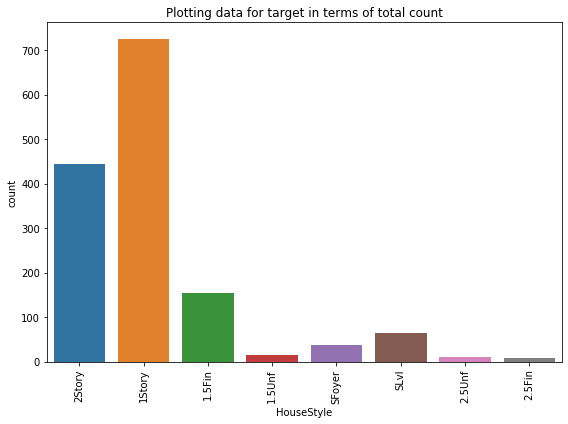

----------------------------------------------------------------------------------------------
Plotting  RoofStyle


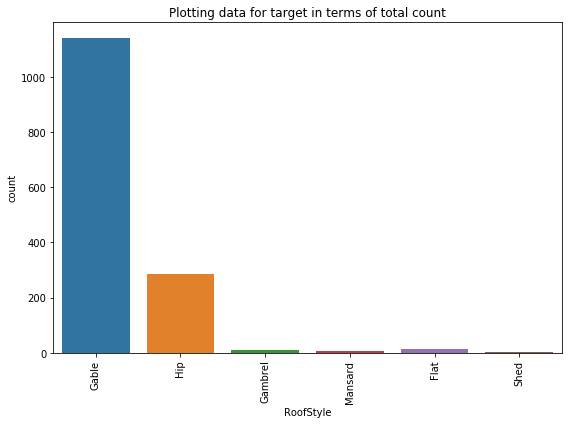

----------------------------------------------------------------------------------------------
Plotting  RoofMatl


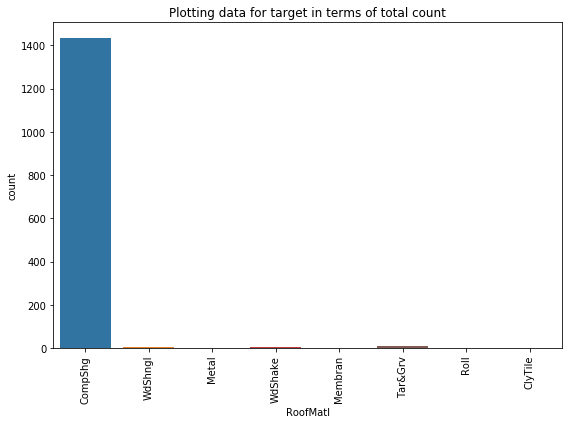

----------------------------------------------------------------------------------------------
Plotting  Exterior1st


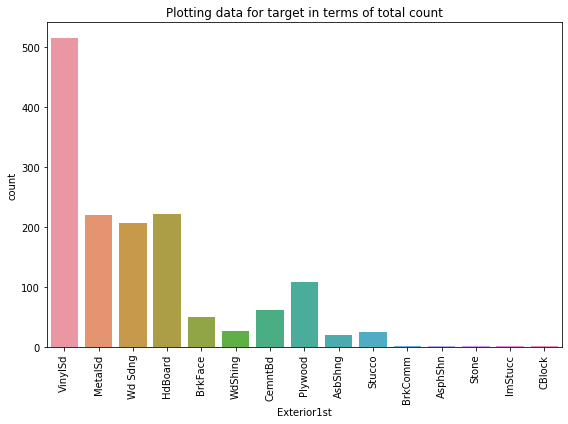

----------------------------------------------------------------------------------------------
Plotting  Exterior2nd


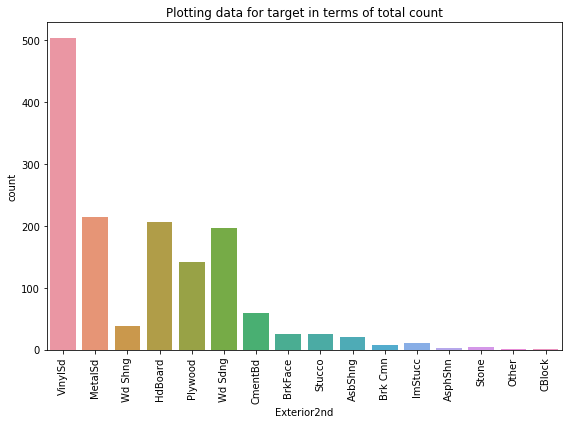

----------------------------------------------------------------------------------------------
Plotting  MasVnrType


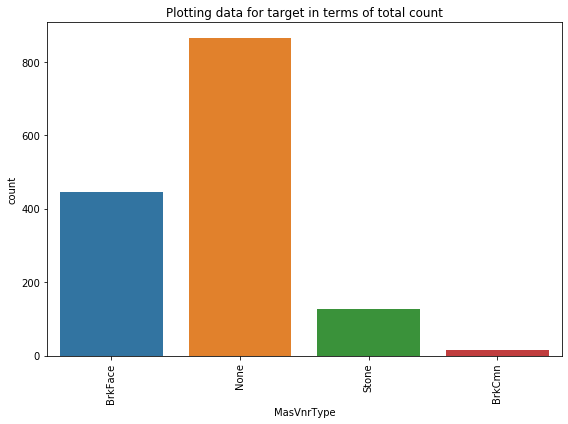

----------------------------------------------------------------------------------------------
Plotting  ExterQual


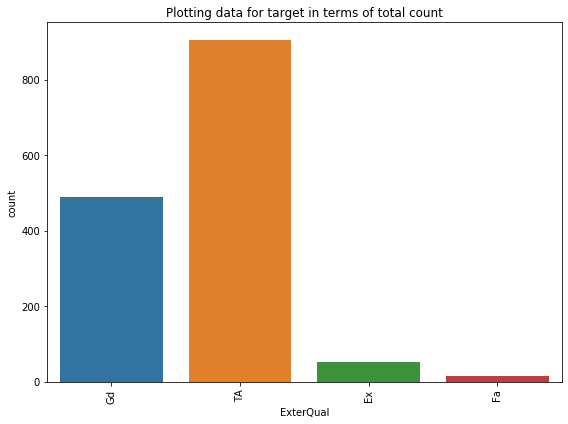

----------------------------------------------------------------------------------------------
Plotting  ExterCond


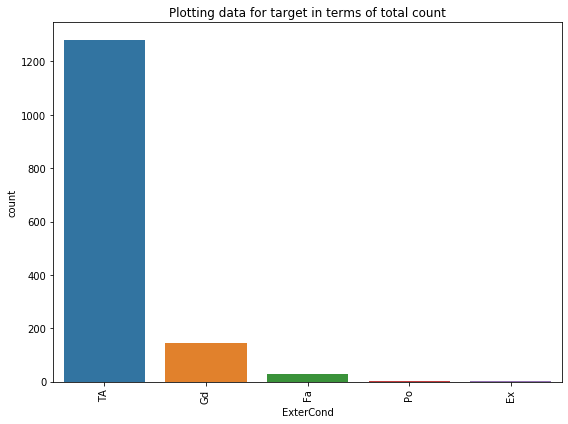

----------------------------------------------------------------------------------------------
Plotting  Foundation


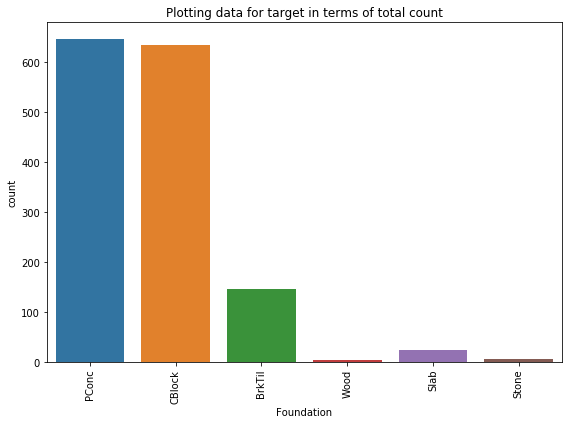

----------------------------------------------------------------------------------------------
Plotting  BsmtQual


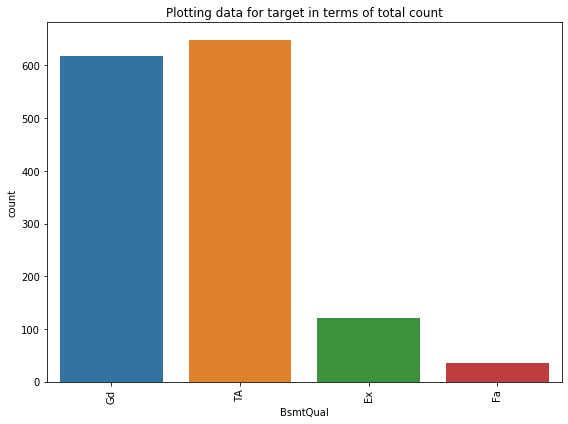

----------------------------------------------------------------------------------------------
Plotting  BsmtCond


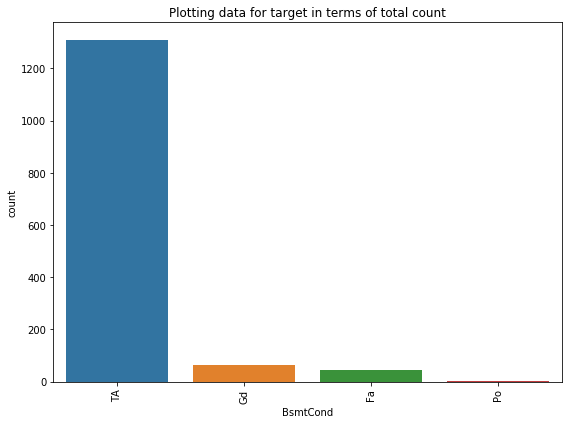

----------------------------------------------------------------------------------------------
Plotting  BsmtExposure


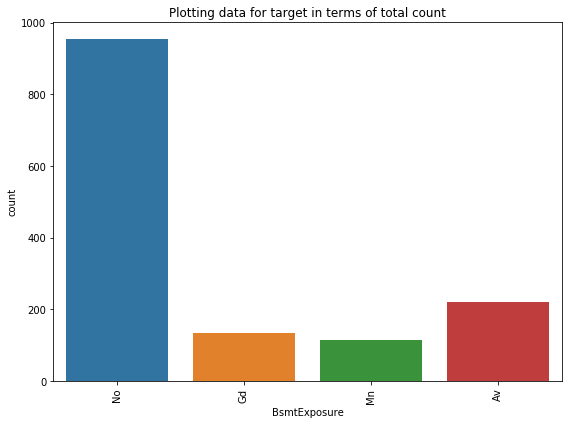

----------------------------------------------------------------------------------------------
Plotting  BsmtFinType1


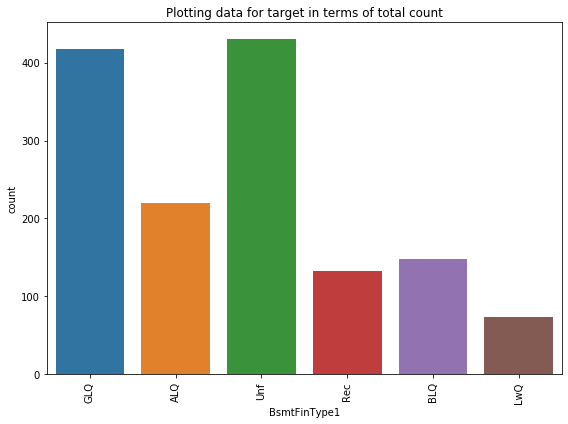

----------------------------------------------------------------------------------------------
Plotting  BsmtFinType2


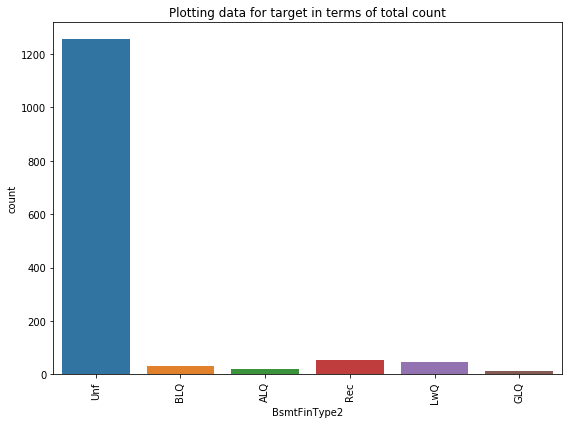

----------------------------------------------------------------------------------------------
Plotting  Heating


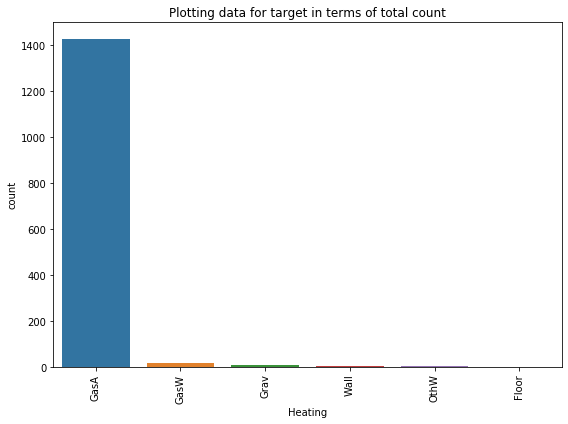

----------------------------------------------------------------------------------------------
Plotting  HeatingQC


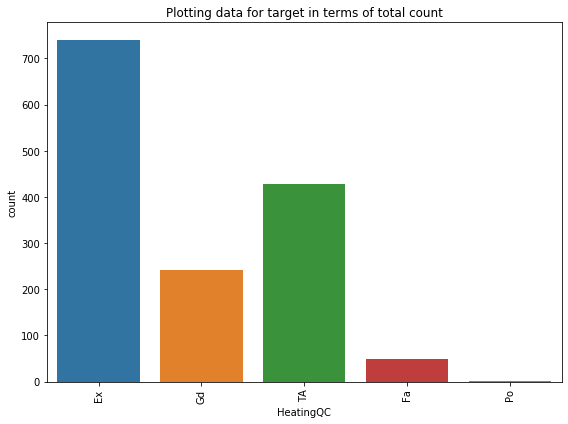

----------------------------------------------------------------------------------------------
Plotting  CentralAir


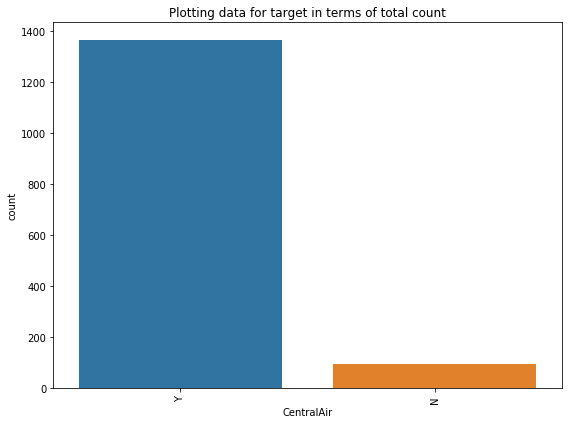

----------------------------------------------------------------------------------------------
Plotting  Electrical


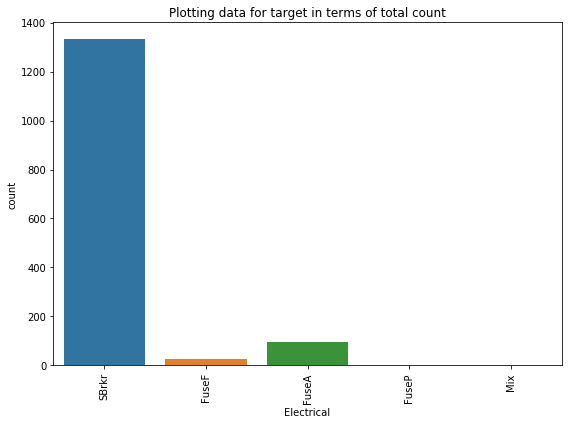

----------------------------------------------------------------------------------------------
Plotting  KitchenQual


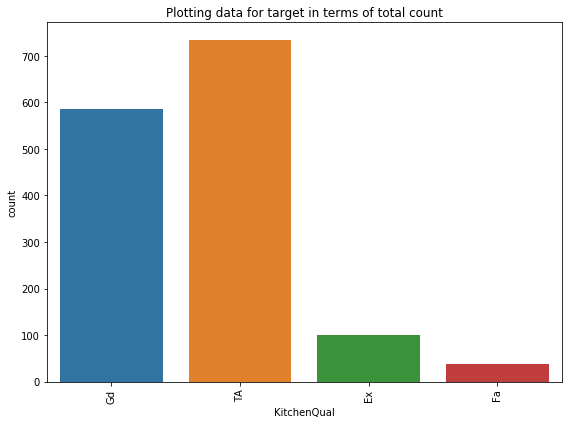

----------------------------------------------------------------------------------------------
Plotting  Functional


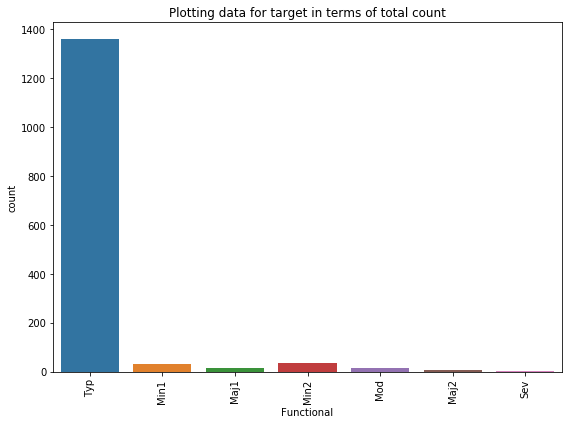

----------------------------------------------------------------------------------------------
Plotting  FireplaceQu


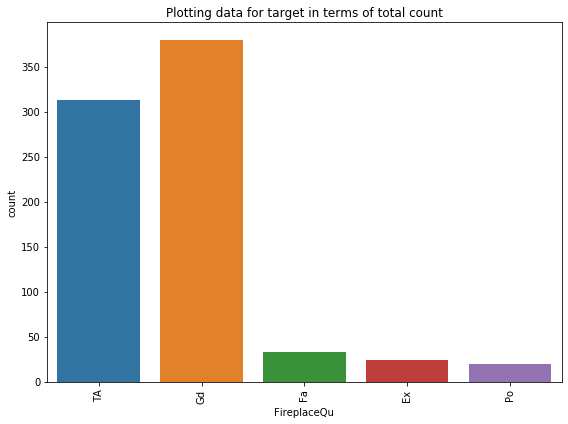

----------------------------------------------------------------------------------------------
Plotting  GarageType


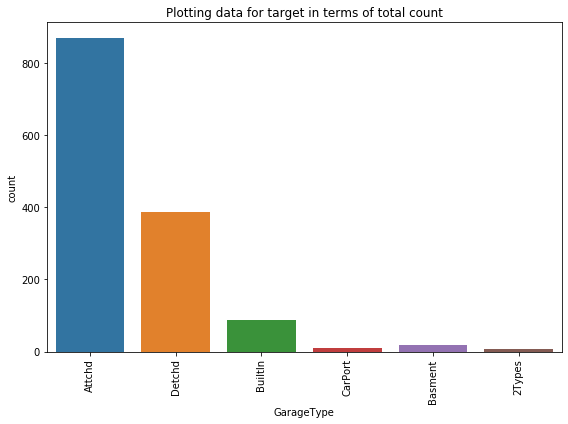

----------------------------------------------------------------------------------------------
Plotting  GarageFinish


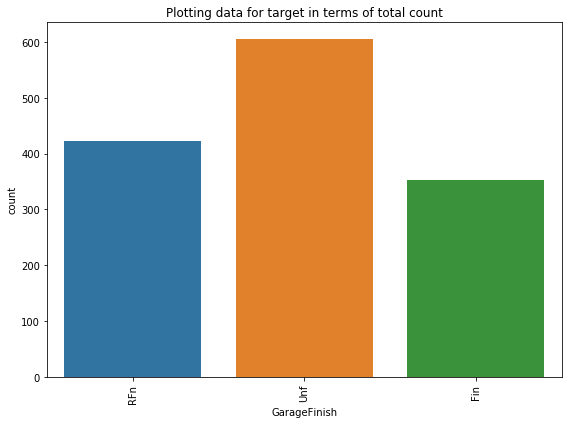

----------------------------------------------------------------------------------------------
Plotting  GarageQual


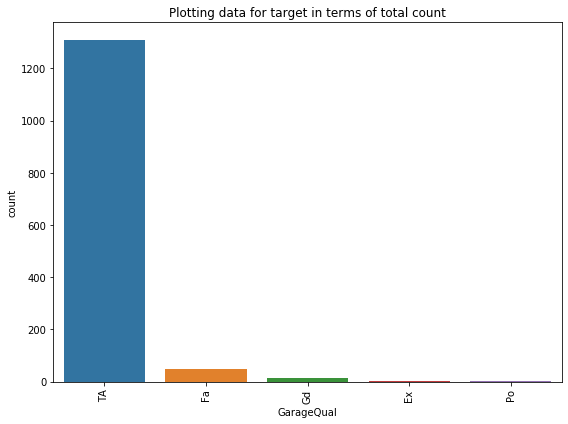

----------------------------------------------------------------------------------------------
Plotting  GarageCond


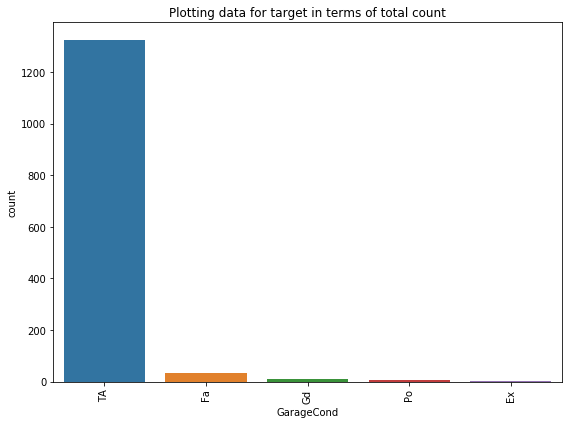

----------------------------------------------------------------------------------------------
Plotting  PavedDrive


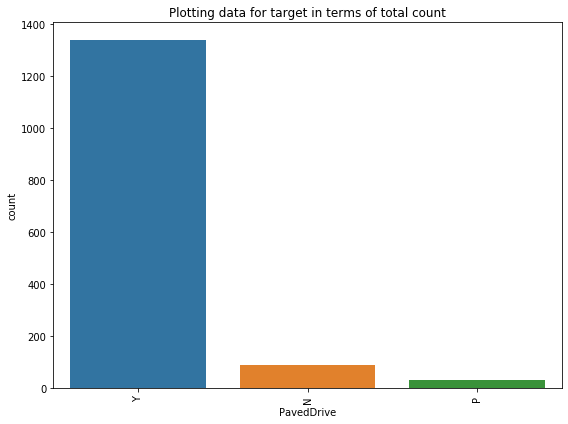

----------------------------------------------------------------------------------------------
Plotting  PoolQC


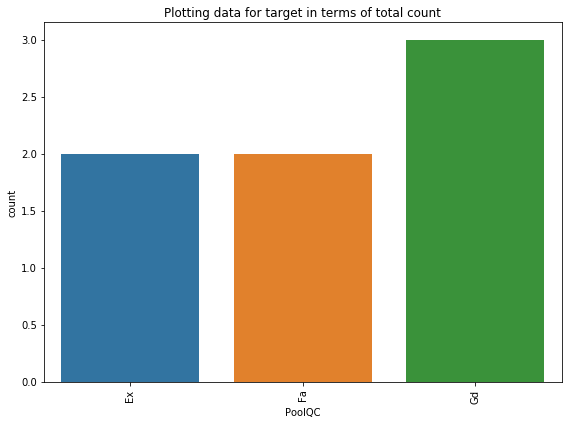

----------------------------------------------------------------------------------------------
Plotting  Fence


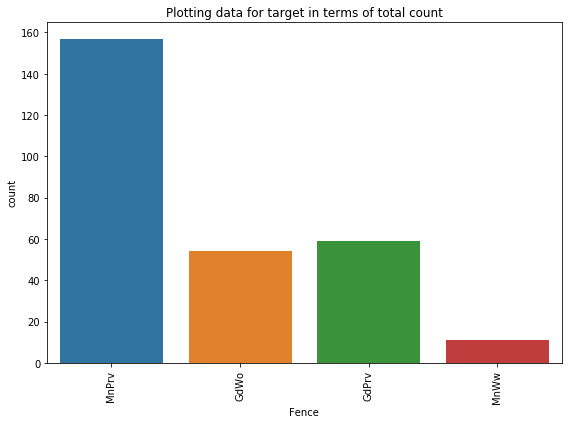

----------------------------------------------------------------------------------------------
Plotting  MiscFeature


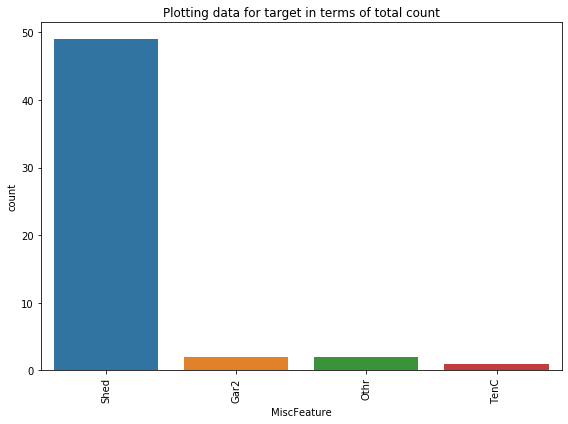

----------------------------------------------------------------------------------------------
Plotting  SaleType


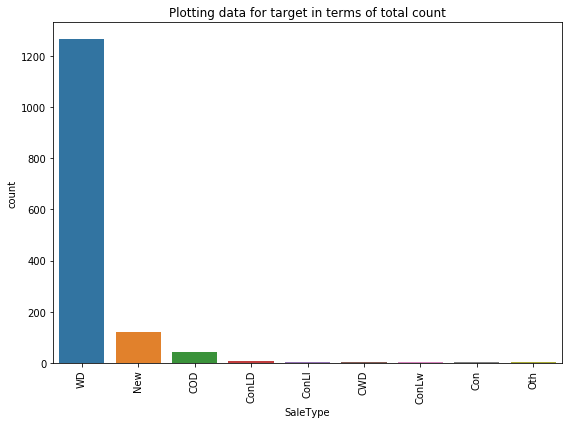

----------------------------------------------------------------------------------------------
Plotting  SaleCondition


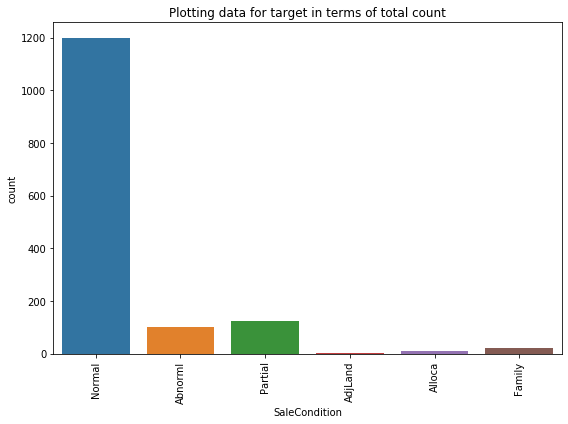

----------------------------------------------------------------------------------------------


In [9]:
#using For loop plotting the count charts
for column in cat:
    print("Plotting ", column)
    plotting(df, column)
    print('----------------------------------------------------------------------------------------------')

In [10]:
#Columns having NAN Value which is not actually null value .so , Replacing those with "No".
NA_Col = ['Alley', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
df[NA_Col] = df[NA_Col].fillna('No')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No,No,No,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No,No,No,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No,No,No,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No,No,No,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No,No,No,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,No,MnPrv,No,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,No,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,

In [11]:
#Also we found that below columns have no imbalance so is insignificant .Hence is dropping.
df=df.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating','CentralAir','Electrical',
            'Functional','GarageCond','PavedDrive','PoolQC','MiscFeature','MSZoning','LotConfig','Condition1','BldgType','RoofStyle','ExterCond',
            'BsmtExposure','BsmtFinType2','GarageQual','Fence','SaleType','SaleCondition'],axis=1)

In [12]:
num = list(df.select_dtypes(include=['int64', 'float64']).columns)

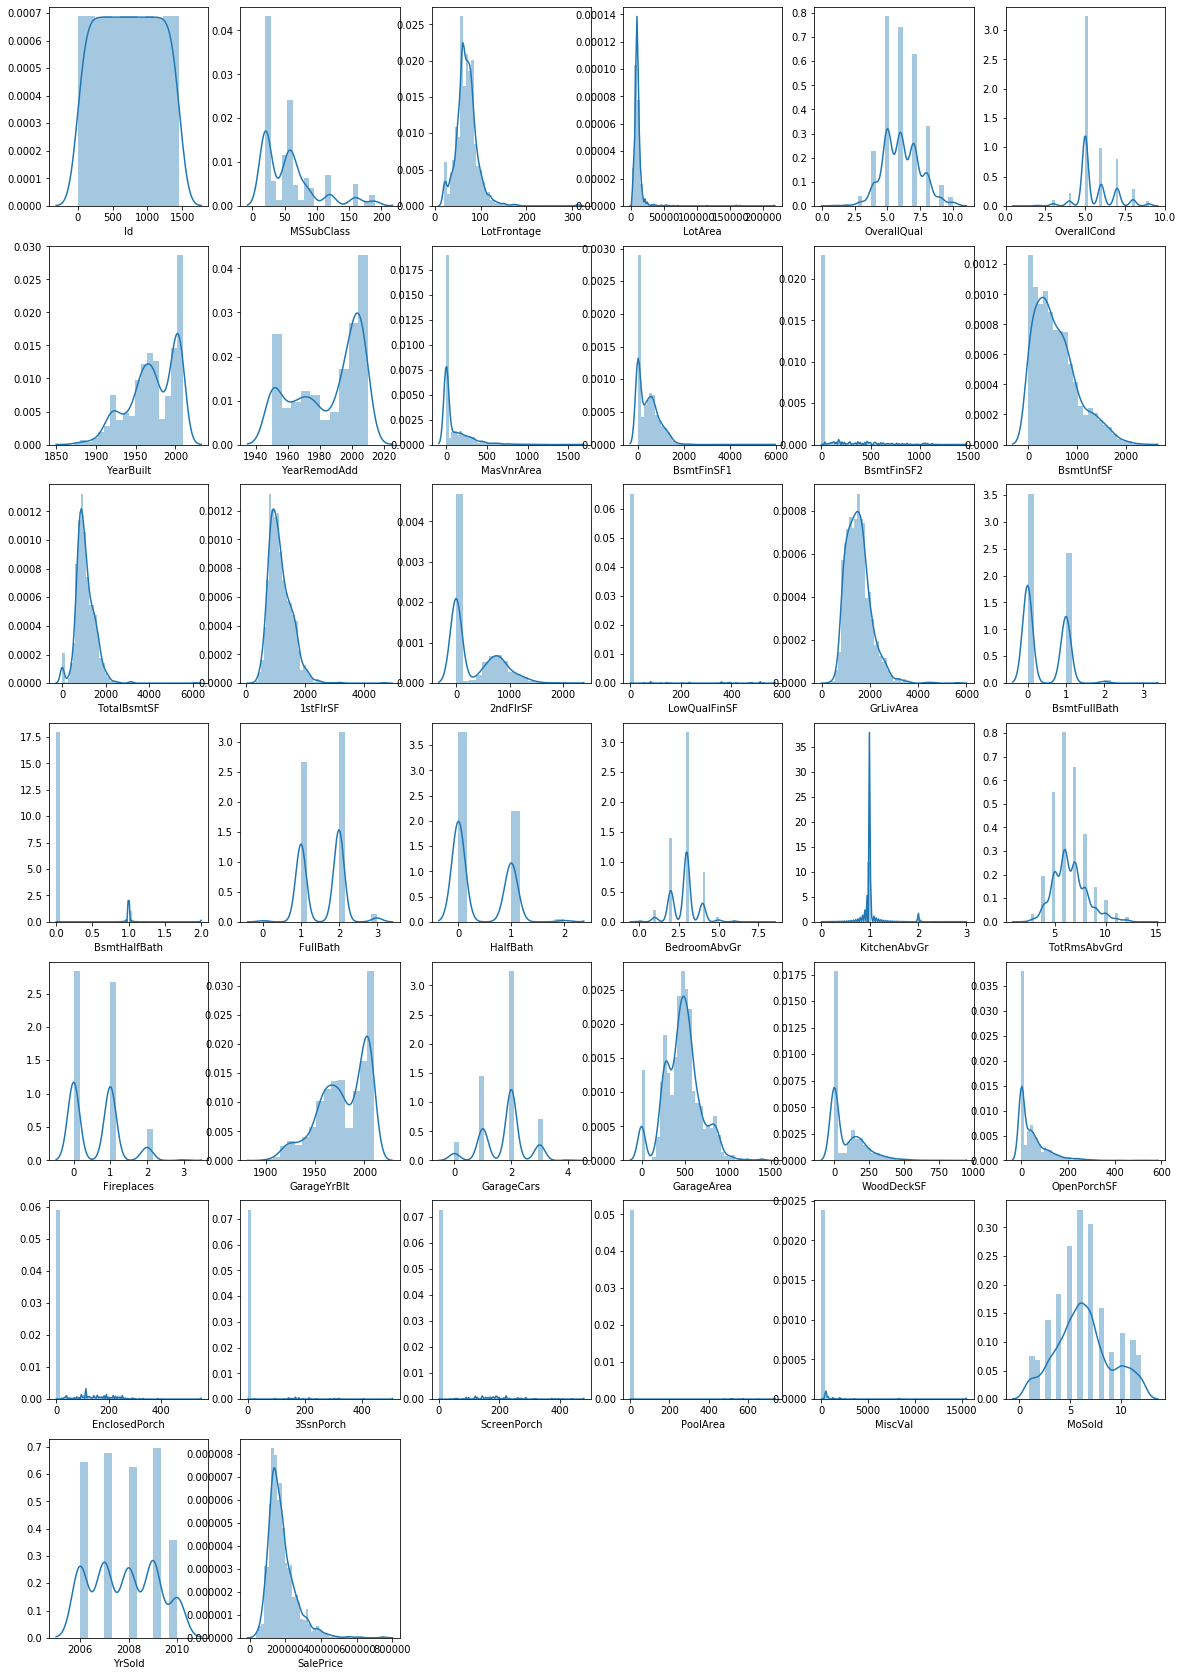

In [13]:
#Plotting the density plot of numerical data
plt.figure(figsize=(20,30))
for column in num:
    plt.subplot(7,6,num.index(column)+1)
    sns.distplot(df[column].dropna())
    
plt.show()

# Missing Value Treatment

In [14]:
#Percentage of missing value in the data.
percentage_df = (df.isnull().mean())*100
percentage_df = pd.DataFrame(percentage_df)
percentage_df = percentage_df.reset_index() 
percentage_df.columns = ["Features","Null_Pencentage"]  
percentage_df

,Features,Null_Pencentage
0,Id,0.000000
1,MSSubClass,0.000000
2,LotFrontage,17.739726
3,LotArea,0.000000
4,LotShape,0.000000
5,Neighborhood,0.000000
6,HouseStyle,0.000000
7,OverallQual,0.000000
8,OverallCond,0.000000
9,YearBuilt,0.000000


In [15]:
#As LotFrontage and GarageYrBlt have 17 and 5 percent missing value .Since is numerical value imputing with the medians:-
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
#Now dropping minimal null value so as to make data ready for model building.
df = df.dropna()
df.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,Reg,CollgCr,2Story,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,No,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,Reg,Veenker,1Story,6,8,1976,1976,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,IR1,CollgCr,2Story,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,IR1,Crawfor,2Story,7,5,1915,1970,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,IR1,NoRidge,2Story,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000


In [16]:
#percentage of missing value in the data.
percentage_df = (df.isnull().mean())*100
percentage_df = pd.DataFrame(percentage_df)
percentage_df = percentage_df.reset_index() 
percentage_df.columns = ["Features","Null_Pencentage"]  
percentage_df

,Features,Null_Pencentage
0,Id,0.0
1,MSSubClass,0.0
2,LotFrontage,0.0
3,LotArea,0.0
4,LotShape,0.0
5,Neighborhood,0.0
6,HouseStyle,0.0
7,OverallQual,0.0
8,OverallCond,0.0
9,YearBuilt,0.0


In [17]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,729.822314,56.949036,69.847796,10507.276171,6.092975,5.579201,1971.116391,1984.775482,103.685262,441.970386,46.805785,567.070937,1055.847107,1161.270661,346.944215,5.876722,1514.091598,0.423554,0.057851,1.562672,0.381543,2.867080,1.046143,6.517218,0.612259,1978.464876,1.765152,472.475207,94.416667,46.390496,21.937328,3.428375,15.143939,2.774105,43.728650,6.318182,2007.815427,180615.063361
std,421.938123,42.340097,22.036987,9989.563592,1.381289,1.113136,30.193761,20.652466,181.066207,455.360279,161.726239,442.082927,438.119089,385.018424,436.370724,48.754995,525.627765,0.518782,0.239372,0.550231,0.502664,0.814812,0.219498,1.626065,0.643422,23.992809,0.748496,214.106397,125.393706,66.048619,61.089879,29.396943,55.899665,40.287389,497.478278,2.699644,1.328927,79285.541485
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.750000,20.000000,60.000000,7538.750000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,222.500000,794.750000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,327.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,729.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,381.000000,0.000000,477.500000,990.500000,1086.000000,0.000000,0.000000,1461.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162700.000000
75%,1095.250000,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,706.500000,0.000000,808.000000,1297.250000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.900000,120.000000,92.000000,14373.900000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1063.500000,118.800000,1231.600000,1601.800000,1679.900000,953.600000,0.000000,2157.900000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,756.900000,261.900000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,277950.000000
95%,1387.450000,160.000000,104.000000,17299.350000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1271.800000,397.800000,1468.000000,1748.700000,1826.900000,1141.450000,0.000000,2463.800000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,848.700000,335.000000,172.900000,180.000000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,325793.200000
99%,1

In [18]:
#From above analysis of describe found that below columns need outlier treatment.
num_out = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','SalePrice']

In [19]:
#Using IQR Method for outlier Treatment:-
def subset_by_iqr(df, column, whisker_width=1.5):
    # Calculate Q1, Q3 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     

In [20]:
for i in num_out:
    df = subset_by_iqr(df, i , whisker_width=1.5)

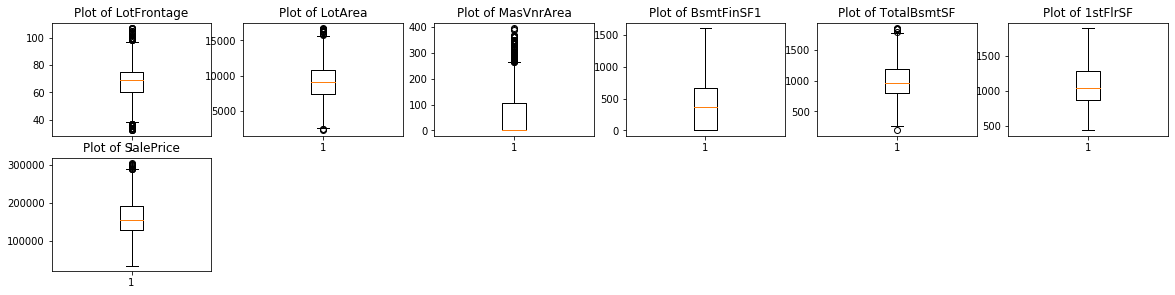

In [21]:
#Box plots for outliers
plt.figure(figsize=(20, 17))
for column in num_out:
    title = "Plot of "+column
    plt.subplot(7,6,num_out.index(column)+1)
    plt.boxplot(df[column])
    plt.title(title)
plt.show()

In [22]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,734.591818,54.240909,67.265455,9105.994545,5.893636,5.647273,1968.195455,1983.626364,59.734545,399.000909,45.633636,567.410909,1012.045455,1093.968182,319.415455,6.179091,1419.562727,0.401818,0.062727,1.490909,0.349091,2.856364,1.040909,6.321818,0.527273,1976.603636,1.655455,441.147273,85.645455,41.540000,24.808182,3.099091,14.510909,1.584545,41.394545,6.335455,2007.806364,163350.448182
std,419.366336,38.779036,13.679700,2720.914718,1.174709,1.133148,30.896213,20.845230,98.478445,377.030277,155.715161,406.292266,301.680624,289.199809,408.506242,49.794370,425.198356,0.508702,0.249971,0.526728,0.497445,0.797691,0.211496,1.461074,0.604940,24.533188,0.706410,193.598160,114.885304,61.724042,62.725049,28.989820,54.395837,30.439294,497.142203,2.692492,1.323049,49985.269407
min,1.000000,20.000000,32.000000,2268.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,190.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,375.750000,20.000000,60.000000,7493.000000,5.000000,5.000000,1949.000000,1965.000000,0.000000,0.000000,0.000000,251.750000,799.750000,866.000000,0.000000,0.000000,1094.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,304.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,128800.000000
50%,739.500000,50.000000,69.000000,9084.000000,6.000000,5.000000,1970.000000,1992.000000,0.000000,375.000000,0.000000,493.000000,959.500000,1043.000000,0.000000,0.000000,1383.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1980.000000,2.000000,459.500000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,155000.000000
75%,1099.250000,70.000000,75.000000,10762.000000,7.000000,6.000000,1999.000000,2003.000000,105.250000,663.250000,0.000000,806.000000,1199.250000,1279.500000,709.000000,0.000000,1682.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,556.500000,156.500000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,193125.000000
90%,1316.100000,120.000000,85.000000,12437.600000,7.000000,7.000000,2005.000000,2006.000000,225.100000,922.000000,123.200000,1141.400000,1468.000000,1526.600000,896.000000,0.000000,1959.100000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2005.000000,2.000000,666.100000,239.100000,120.000000,116.400000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,235000.000000
95%,1388.100000,120.000000,90.050000,13760.650000,8.000000,8.000000,2006.000000,2007.000000,288.000000,1071.350000,380.550000,1374.050000,1588.250000,1654.100000,1039.050000,0.000000,2198.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,2006.000000,3.000000,779.150000,309.150000,160.100000,185.200000,0.000000,154.050000,0.000000,0.000000,11.000000,2010.000000,260020.000000
99%,1444.

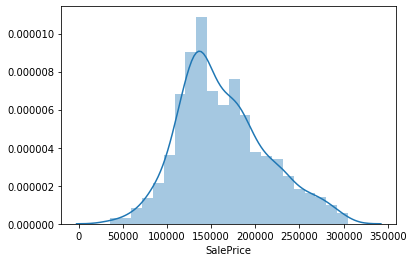

In [23]:
#Cheking normal distribution of Target column:-
sns.distplot(df['SalePrice'])

In [24]:
#Converting year column to age so as to get clear understanding :-
currentYear = max(df.YrSold)
df['AgeYearBuilt'] = currentYear - df['YearBuilt']
df['AgeRemodAdd'] = currentYear - df['YearRemodAdd']
df['AgeSold'] = currentYear - df['YrSold']
df['AgeGarageYrBlt'] = currentYear - df['GarageYrBlt']
df = df.drop(['YearBuilt', 'YearRemodAdd','YrSold', 'GarageYrBlt'], 1)
df

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeYearBuilt,AgeRemodAdd,AgeSold,AgeGarageYrBlt
0,1,60,65.0,8450,Reg,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,No,Attchd,RFn,2,548,0,61,0,0,0,0,0,2,208500,7,7,2,7.0
1,2,20,80.0,9600,Reg,Veenker,1Story,6,8,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,0,5,181500,34,34,3,34.0
2,3,60,68.0,11250,IR1,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,0,9,223500,9,8,2,9.0
3,4,70,60.0,9550,IR1,Crawfor,2Story,7,5,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,0,2,140000,95,40,4,12.0
4,5,60,84.0,14260,IR1,NoRidge,2Story,8,5,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,0,12,250000,10,10,2,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,62.0,7500,Reg,Somerst,1Story,7,5,VinylSd,VinylSd,None,0.0,Gd,PConc,Gd,GLQ,410,0,811,1221,Ex,1221,0,0,1221,1,0,2,0,2,1,Gd,6,0,No,Attchd,RFn,2,400,0,113,0,0,0,0,0,10,185000,6,5,1,6.0
1455,1456,60,62.0,7917,Reg,Gilbert,2Story,6,5,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,Unf,0,0,953,953,Ex,953,694,0,1647,0,0,2,1,3,1,TA,7,1,TA,Attchd,RFn,2,460,0,40,0,0,0,0,0,8,175000,11,10,3,11.0
1457,1458,70,66.0,9042,Reg,Crawfor,2Story,7,9,CemntBd,CmentBd,None,0.0,Ex,Stone,TA,GLQ,275,0,877,1152,Ex,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,2,Gd,Attchd,RFn,1,252,0,60,0,0,0,0,2500,5,266500,69,4,0,69.0
1458,1459,20,68.0,9717,Reg,NAmes,1Story,5,6,MetalSd,MetalSd,None,0.0,TA,CBlock,TA,GLQ,49,1029,0,1078,Gd,1078,0,0,1078,1,0,1,0,2,1,Gd,5,0,No,Attchd,Unf,1,240,366,0,112,0,0,0,0,4,142125,60,14,0,60.0


## Performing EDA for few features to find the pattern.

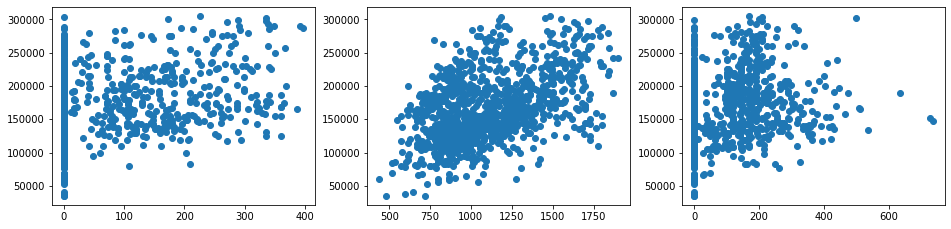

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df['MasVnrArea'],df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['WoodDeckSF'],df.SalePrice)

***checking multicolinearity***

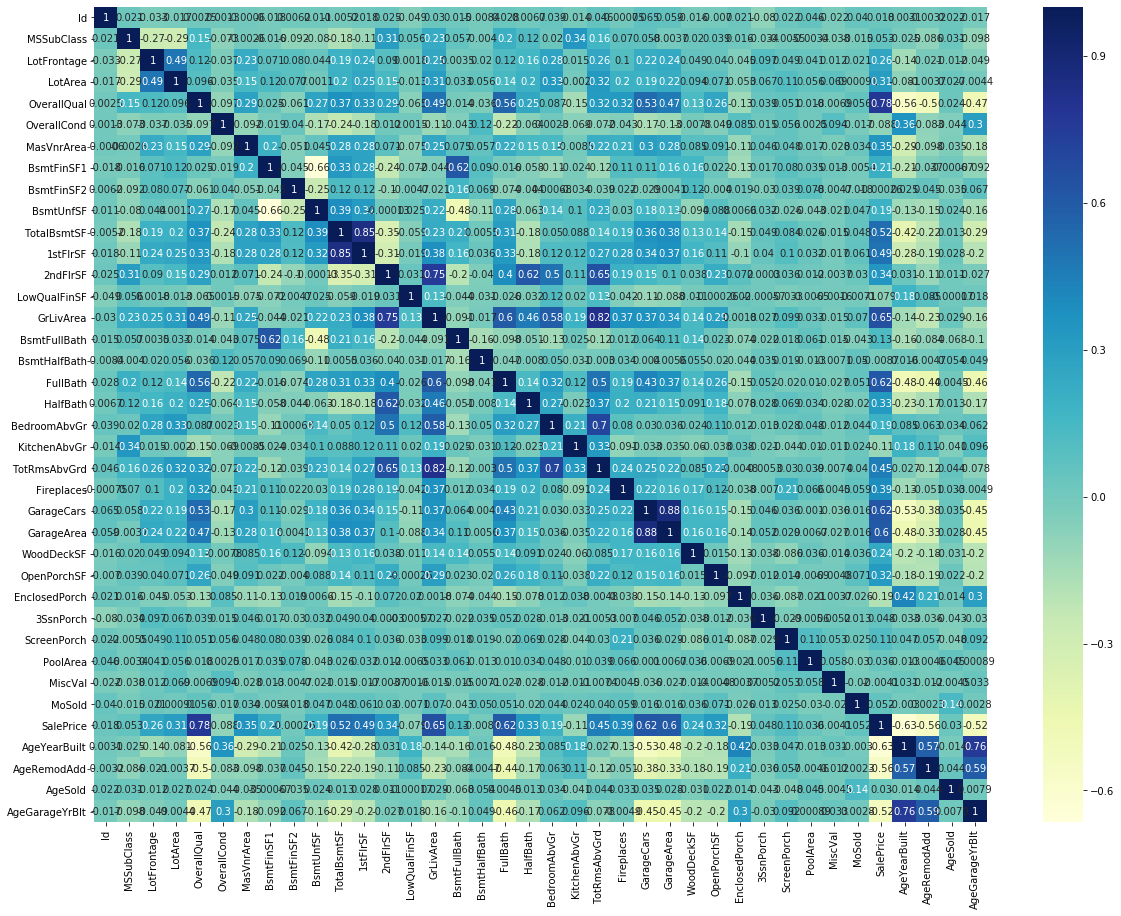

In [26]:
# Plotting correlations on a heatmap

plt.figure(figsize=(20,15))

numeric = df.select_dtypes(include=['float64', 'int64'])
cor = numeric.corr()
# Plotting heatmap
ax = sns.heatmap(cor, cmap="YlGnBu", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
plt.show()

In [27]:
df.shape

(1100, 53)

In [28]:
#Dropping Highly Correlated columns:-
df.drop(['GrLivArea','TotRmsAbvGrd','GarageCars','AgeGarageYrBlt'],axis=1,inplace=True)

In [29]:
#defing value count to get the value counts so as to drop the columns which is not contributing much:-
def value1(df,col):
   return df[col].value_counts()

In [30]:
#list of categorical columns
cat1 = list(df.select_dtypes(include= 'object').columns)


In [31]:
#Displaying the counts
for i in cat1:
   print(value1(df,i))

Reg    714
IR1    363
IR2     20
IR3      3
Name: LotShape, dtype: int64
NAmes      190
CollgCr    135
OldTown    104
Edwards     76
Sawyer      67
Gilbert     64
NWAmes      59
BrkSide     54
Somerst     51
SawyerW     49
Mitchel     36
Crawfor     35
IDOTRR      33
NridgHt     28
SWISU       25
Timber      22
Blmngtn     17
NoRidge     13
StoneBr     13
ClearCr     12
Veenker      7
MeadowV      6
NPkVill      4
Name: Neighborhood, dtype: int64
1Story    552
2Story    301
1.5Fin    132
SLvl       55
SFoyer     30
1.5Unf     14
2.5Unf     10
2.5Fin      6
Name: HouseStyle, dtype: int64
VinylSd    389
MetalSd    179
HdBoard    175
Wd Sdng    167
Plywood     75
BrkFace     31
CemntBd     28
WdShing     19
AsbShng     17
Stucco      16
BrkComm      1
Stone        1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
VinylSd    381
MetalSd    173
Wd Sdng    161
HdBoard    161
Plywood    104
Wd Shng     30
CmentBd     27
AsbShng     18
Stucco      18
BrkFace     15
ImStucc      6

In [32]:
# Creating dummy variables
l_df = pd.get_dummies(df)
# Droping 1 less dependent dummy variable and Keeping n-1 varaibles for each feature 
l_df.drop(['LotShape_IR3','Neighborhood_NPkVill','HouseStyle_2.5Fin','Exterior1st_Stone','Exterior2nd_Brk Cmn',
          'MasVnrType_BrkCmn','ExterQual_Ex','Foundation_Wood','BsmtQual_Ex','BsmtFinType1_LwQ','HeatingQC_Po',
          'KitchenQual_Ex','FireplaceQu_Ex','GarageType_2Types','GarageFinish_No'],axis=1,inplace=True)
l_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeYearBuilt,AgeRemodAdd,AgeSold,LotShape_IR1,LotShape_IR2,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,1,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,2,208500,7,7,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,5,181500,34,34,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,9,223500,9,8,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,2,140000,95,40,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,5,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12,250000,10,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [33]:
#Using For subjective question:-
s_df=l_df

### Model Building

In [34]:
from sklearn.model_selection import train_test_split
#Using the standard scaler for scaling 
from sklearn.preprocessing import StandardScaler

In [35]:
y = l_df.loc[:, 'SalePrice']
X = l_df.loc[:, l_df.columns != 'SalePrice']

# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 100)

# scale
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
#Importing required libraries for regularisation:-
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Ridge Regression

In [37]:
# list of alphas to tune hyperparameter:-
list_alpha = [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,1,10,100,200,400]

params = {'alpha': list_alpha}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 1, 10, 100, 200, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [38]:
model_cv.best_score_

0.8835892267045954

In [39]:
model_cv.best_params_

{'alpha': 10}

In [40]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.067396,0.112311,0.002398,0.000800,0.0001,{'alpha': 0.0001},0.856947,0.869291,0.916054,0.893511,0.849347,0.877030,0.024593,13,0.936100,0.936528,0.928101,0.932289,0.934252,0.933454,0.003069
1,0.017399,0.010415,0.002407,0.000500,0.001,{'alpha': 0.001},0.856951,0.869291,0.916057,0.893512,0.849406,0.877043,0.024580,12,0.936100,0.936528,0.928101,0.932289,0.934252,0.933454,0.003069
2,0.012193,0.001166,0.002011,0.000024,0.01,{'alpha': 0.01},0.856986,0.869293,0.916080,0.893527,0.849979,0.877173,0.024455,11,0.936100,0.936528,0.928101,0.932289,0.934252,0.933454,0.003069
3,0.026202,0.018631,0.002508,0.000649,0.05,{'alpha': 0.05},0.857126,0.869304,0.916158,0.893592,0.852308,0.877697,0.023959,10,0.936097,0.936528,0.928098,0.932288,0.934248,0.933452,0.003069
4,0.023995,0.012291,0.005196,0.003865,0.1,{'alpha': 0.1},0.857265,0.869319,0.916212,0.893669,0.854785,0.878250,0.023450,9,0.936089,0.936526,0.928090,0.932285,0.934239,0.933446,0.003070


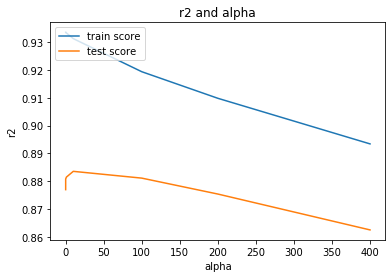

In [41]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [42]:
#Hence from above graph as well we get apha as 10:-
ridge1 = Ridge(alpha=10)
ridge1.fit(X_train, y_train)
print("Number of non-zero Coefficients {}".format(np.sum(ridge1.coef_!=0)))
y_pred_train = ridge1.predict(X_train)
print("RMSE Train {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print("R2 Score Train {}".format(r2_score(y_train, y_pred_train)))

y_pred_test = ridge1.predict(X_test)
print("RMSE Test {}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print("R2 Score Test {}".format(r2_score(y_test, y_pred_test)))

Number of non-zero Coefficients 128
RMSE Train 13149.898789548562
R2 Score Train 0.9278949871324731
RMSE Test 17488.517640099846
R2 Score Test 0.8877612401658055


In [43]:
model_parameters = list(ridge1.coef_)
model_parameters.insert(0, ridge1.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
Ridge_sort_feature = list(zip(cols, model_parameters))
r_df = pd.DataFrame(Ridge_sort_feature)
r_df.columns = ['Features','Coefficient']
r_df = r_df.sort_values('Coefficient',ascending = False)
r_df

,Features,Coefficient
0,constant,163490.003
13,2ndFlrSF,15254.370
12,1stFlrSF,7705.578
11,TotalBsmtSF,7614.677
5,OverallQual,7478.259
6,OverallCond,5872.211
4,LotArea,4955.877
8,BsmtFinSF1,4944.385
22,GarageArea,4658.454
41,Neighborhood_Crawfor,4277.219


# Lasso Regression

In [44]:
list_alpha = [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,1,10,50,100,200,500]

params = {'alpha': list_alpha}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1
                        )            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   21.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 1, 10, 50, 100, 200, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [45]:
model_cv.best_score_

0.8878385635356972

In [46]:
model_cv.best_params_

{'alpha': 200}

In [47]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.482581,0.139437,0.003208,1.956823e-03,0.0001,{'alpha': 0.0001},0.856098,0.869410,0.916165,0.893721,0.853137,0.877706,0.023979,16,0.936094,0.936528,0.928094,0.932289,0.934245,0.933450,0.00307
1,0.444463,0.118795,0.003598,2.243349e-03,0.001,{'alpha': 0.001},0.856099,0.869410,0.916165,0.893721,0.853139,0.877707,0.023978,15,0.936094,0.936528,0.928094,0.932289,0.934245,0.933450,0.00307
2,0.334915,0.037659,0.002196,4.015085e-04,0.01,{'alpha': 0.01},0.856107,0.869408,0.916165,0.893720,0.853160,0.877712,0.023973,14,0.936094,0.936528,0.928094,0.932289,0.934245,0.933450,0.00307
3,0.294886,0.015383,0.001998,5.840039e-07,0.05,{'alpha': 0.05},0.856144,0.869402,0.916166,0.893718,0.853249,0.877736,0.023948,13,0.936093,0.936528,0.928094,0.932289,0.934245,0.933450,0.00307
4,0.366441,0.073460,0.011993,1.949153e-02,0.1,{'alpha': 0.1},0.856189,0.869395,0.916167,0.893715,0.853360,0.877765,0.023918,12,0.936093,0.936528,0.928093,0.932289,0.934244,0.933449,0.00307


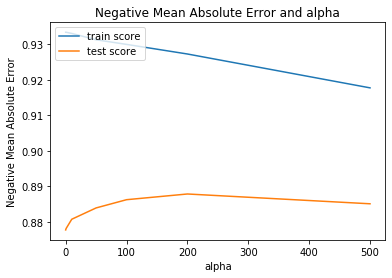

In [48]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [49]:
#Hence from graph as well we get alpha as 200:-
lasso1 = Lasso(alpha = 200)
lasso1.fit(X_train, y_train)
print("Number of non-zero Coefficients {}".format(np.sum(lasso1.coef_!=0)))
y_pred_train = lasso1.predict(X_train)
print("RMSE Train {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print("R2 Score Train {}".format(r2_score(y_train, y_pred_train)))

y_pred_test = lasso1.predict(X_test)
print("RMSE Test {}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print("R2 Score Test {}".format(r2_score(y_test, y_pred_test)))

Number of non-zero Coefficients 92
RMSE Train 13505.385227322702
R2 Score Train 0.9239438055466578
RMSE Test 17166.71913454244
R2 Score Test 0.8918537502089019


In [50]:
model_parameters = list(lasso1.coef_)
model_parameters.insert(0, lasso1.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso1_sort_feature = list(zip(cols, model_parameters))
l_df = pd.DataFrame(lasso1_sort_feature)
l_df.columns = ['Features','Coefficient']
l_df = l_df.sort_values('Coefficient',ascending = False)
l_df

,Features,Coefficient
0,constant,163490.003
13,2ndFlrSF,17040.879
5,OverallQual,8335.957
12,1stFlrSF,8055.215
11,TotalBsmtSF,7420.378
6,OverallCond,5790.856
4,LotArea,4782.675
22,GarageArea,4444.720
8,BsmtFinSF1,4389.961
41,Neighborhood_Crawfor,4352.242


In [51]:
lasso1 = Lasso(alpha = 400)
lasso1.fit(X_train, y_train)
print("Number of non-zero Coefficients {}".format(np.sum(lasso1.coef_!=0)))
y_pred_train = lasso1.predict(X_train)
print("RMSE Train {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print("R2 Score Train {}".format(r2_score(y_train, y_pred_train)))

y_pred_test = lasso1.predict(X_test)
print("RMSE Test {}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print("R2 Score Test {}".format(r2_score(y_test, y_pred_test)))

Number of non-zero Coefficients 76
RMSE Train 14060.47664618622
R2 Score Train 0.9175632759494248
RMSE Test 17374.148952006326
R2 Score Test 0.8892244432318924


In [52]:
ridge1 = Ridge(alpha=20)
ridge1.fit(X_train, y_train)
print("Number of non-zero Coefficients {}".format(np.sum(ridge1.coef_!=0)))
y_pred_train = ridge1.predict(X_train)
print("RMSE Train {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print("R2 Score Train {}".format(r2_score(y_train, y_pred_train)))

y_pred_test = ridge1.predict(X_test)
print("RMSE Test {}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print("R2 Score Test {}".format(r2_score(y_test, y_pred_test)))

Number of non-zero Coefficients 128
RMSE Train 13278.65771290801
R2 Score Train 0.9264760229995365
RMSE Test 17529.603611099024
R2 Score Test 0.8872332531312719


In [53]:
s_df.drop(['2ndFlrSF','OverallQual','1stFlrSF','TotalBsmtSF','OverallCond'],axis=1,inplace=True)

In [54]:
from sklearn.model_selection import train_test_split
#Using the standard scaler for scaling 
from sklearn.preprocessing import StandardScaler

In [55]:
y = s_df.loc[:, 'SalePrice']
X = s_df.loc[:, s_df.columns != 'SalePrice']

# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 100)

# scale
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [58]:
lasso2 = Lasso(alpha = 200)
lasso2.fit(X_train, y_train)
print("Number of non-zero Coefficients {}".format(np.sum(lasso2.coef_!=0)))
y_pred_train = lasso2.predict(X_train)
print("RMSE Train {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print("R2 Score Train {}".format(r2_score(y_train, y_pred_train)))

y_pred_test = lasso2.predict(X_test)
print("RMSE Test {}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print("R2 Score Test {}".format(r2_score(y_test, y_pred_test)))

Number of non-zero Coefficients 98
RMSE Train 15950.612885198952
R2 Score Train 0.8939097706513808
RMSE Test 20009.110652418713
R2 Score Test 0.8530761052464182


In [59]:
model_parameters = list(lasso2.coef_)
model_parameters.insert(0, lasso2.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso2_sort_feature = list(zip(cols, model_parameters))
l1_df = pd.DataFrame(lasso2_sort_feature)
l1_df.columns = ['Features','Coefficient']
l1_df = l1_df.sort_values('Coefficient',ascending = False)
l1_df

,Features,Coefficient
0,constant,163490.003
6,BsmtFinSF1,17836.477
8,BsmtUnfSF,14265.820
7,BsmtFinSF2,8023.901
17,GarageArea,6506.197
4,LotArea,5484.130
36,Neighborhood_Crawfor,5474.622
12,FullBath,5103.664
58,HouseStyle_2Story,3789.990
63,Exterior1st_BrkFace,3561.422
